# Exercício 1

• Create a Gaussian p.d.f, generate some toy data and fit it

• Extra:

    –Play with some other p.d.f
    • e.g. Exponential pdf
    
• or some other p.d.f you want.

• You can find several pdf in roofit reference documentations

In [1]:
import ROOT

Welcome to JupyROOT 6.20/06


# Fit Gaussiano

In [2]:
x = ROOT.RooRealVar( "Gaussian Distribution", "Gaussian Distribution", -10 , 10 )
mean = ROOT.RooRealVar( "mean" , "mean" , 0 , -10 , 10 )
sigma = ROOT.RooRealVar( "sigma" , "sigma" , 1 , 0.1 , 10 )


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
print('\n',
      'x --> ', x , '\n',
      'mean --> ', mean , '\n',
      'sigma --> ', sigma , '\n'
     )


 x -->  RooRealVar::Gaussian Distribution = 0  L(-10 - 10) 
 
 mean -->  RooRealVar::mean = 0  L(-10 - 10) 
 
 sigma -->  RooRealVar::sigma = 1  L(0.1 - 10) 
 



In [4]:
gauss = ROOT.RooGaussian( "gauss", "gaussian PDF" , x , mean , sigma )

In [5]:
xframe= x.frame()
gauss.plotOn( xframe)
xframe.Draw()

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [6]:
data = gauss.generate( ROOT.RooArgSet(x) , 1000 )

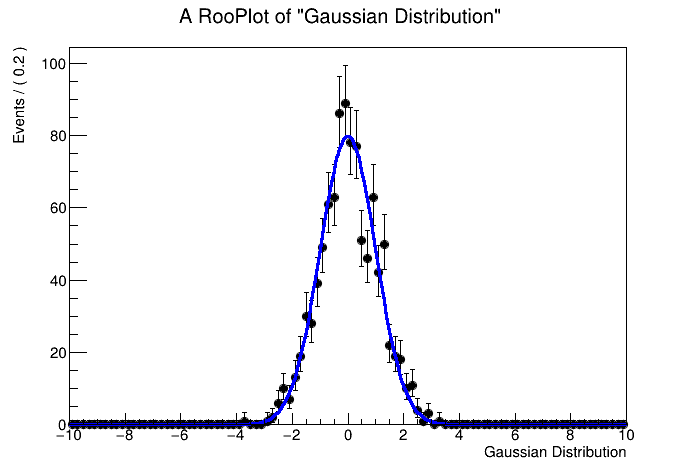

In [7]:
xframe2 = x.frame()
data.plotOn( xframe2 )
gauss.plotOn( xframe2 )
c1 = ROOT.TCanvas()
xframe2.Draw()
c1.Draw()

In [8]:
gauss.fitTo( data )

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        1.00000e+00  4.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=1457.87 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

In [9]:
mean.Print()
sigma.Print()

RooRealVar::mean = 0.0268144 +/- 0.0328196  L(-10 - 10) 
RooRealVar::sigma = 1.03785 +/- 0.0232067  L(0.1 - 10) 


# Para o Fit Exponencial

In [10]:
alpha = ROOT.RooRealVar( "alpha", "slope", -0.1, -5., 0. )
x = ROOT.RooRealVar( "Exponential Distribution", "Exponential Distribution", -10 , 10 )

In [11]:
expo = ROOT.RooExponential( "Exponential", "Exponential PDF" , x , alpha )
data_expo = expo.generate( ROOT.RooArgSet(x) , 10000 )

In [12]:
expo.fitTo( data_expo )

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha       -1.00000e-01  5.00000e-02   -5.00000e+00  0.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=28408.2 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIR

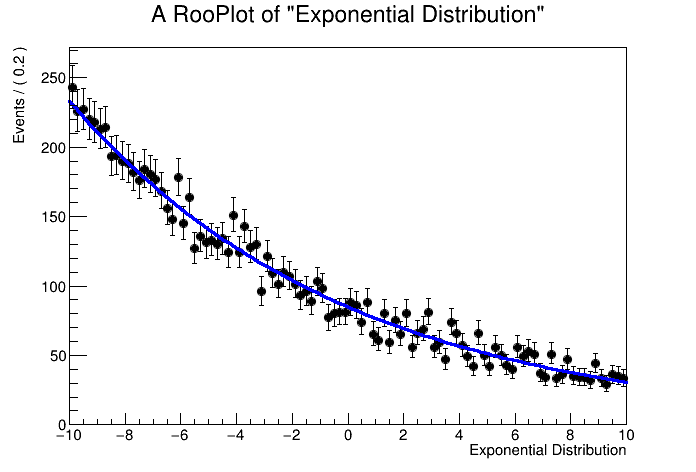

In [13]:
xframe2 = x.frame()
data_expo.plotOn( xframe2 )
expo.plotOn( xframe2 )
c1 = ROOT.TCanvas()
xframe2.Draw()
c1.Draw()